In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# ==================================== #
#  Constants
# ==================================== #

e = 1.602e-19                           #charge of a electron, C / electron volt, J
epsilon0 = 8.854e-12                    #vaccum dielectric constant, F/m
me = 9.109e-31                          #mass of a electron , kg
h = 6.626e-34                           #Planck constant, J*s 
hbar = h/(2*np.pi)
NA = 6.022e23
kb = 1.38e-23                            # Boltzmann constant, J/K
aB = 4*np.pi*epsilon0*hbar**2 / (me*e**2)# Bohr radius, m
Ry = 13.6                                # Ryberg, eV

cal2J = 4.184 
# ==================================== #
#  Metal Units <---> S.I. Units
# ==================================== #

J2eV = 6.2442e18
m2A = 1e10
gmol2g = 1/NA
kg2gmol = 1e3/gmol2g
s2ps = 1e12
s2fs = 1e15

cm2m = 1e-2
gcc2kgm3 = 1e-3/(cm2m**3)

bar2Pa = 1e5
kbar2GPa = 1e3*bar2Pa/1e9
Pa2GPa = 1e-9

kg2g=1e3
m2cm=1e2
mJ2J = 1e-3        

nm2A = 10

# ==================================== #
#  Atomic Units <---> Metal/S.I. Units
# ==================================== #

m2bohr = 1/aB
A2bohr = m2bohr/m2A
eV2Ry = 1/Ry

# ==================================== #
#  PHONON
# ==================================== #

c = 3*10**8                               # speed of light, m/s
omega2k = s2ps*1/(c) *cm2m                # 1/ps -> 1/cm

unit_trans = 1/ NA * (1 / m2cm * m2A) **3 
vpa2rho = (24.3050 + 15.9994) / NA / (1/m2A**3) / (m2cm**3)


from scipy.optimize import curve_fit

comp_dir = '/data/home/djy4/jupyter/MgO/EOS/OSF/compare/'

# kappa data from DPMD calculations

format of data

temp [K]

pressure [GPa]

density [gcc]

thermal conductivity [W/mK]

errorbar of thermal conducivity [W/mK]


In [2]:
# ====================
# PBEsol functional (p,rho,kappa) b1
# ====================

kappa_300k = np.array([
       [300., 300., ],
       [0.4, 14, ],
       [3.54154154, 3.83583584, ],
       [60.33436476239333 ,95.395553261695   ],
       [7.204797336250823,12.133404383342574,]]) 

kappa_2kk = np.array([
       [ 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.],
       [10,20,30,40, 50, 100, 200, 300, 400, 500],
       [ 3.52752753, 3.73073073, 3.90590591, 4.06706707,
       4.20720721, 4.7957958 , 5.63663664, 6.27427427, 6.7997998 ,
       7.26226226],
       [6.765048066693334 ,10.461626017870001,12.457138026238331,14.243757513884999,17.999787126188668,36.62854729228267 ,69.35657958305734 ,98.27332622624266 ,129.89468462254334 ,155.76683677551583 ],
       [0.612031819761114,0.9931988522565502,1.1649619182020499,1.410254165584864,1.5183560092000763,2.9688730772534355,4.556136713494715,8.518463599358885,12.753557458569674, 15.906425718335903 ]])

kappa_4kk = np.array([
   [4000., 4000., 4000., 4000., 4000.],
   [100, 200, 300, 400, 500],
   [4.66266266, 5.53153153, 6.17617618, 6.71571572, 7.18518519],               
   [ 11.488658247568   ,23.951826283826666,36.785489816235334,46.228033202535336,58.35046371722667 ],
   [ 1.0566219116845053,1.9681023046912625,3.149060732972281,3.599254237676721,4.704461471489108]])

kappa_6kk = np.array([
       [6000., 6000., 6000., 6000., 6000.],
       [100, 200, 300, 400, 500],
       [4.51551552, 5.41241241, 6.08508509, 6.63863864, 7.10810811],
       [5.151648240104667 ,12.498287844828667,18.497239687792664,24.748800654683333,30.148921084568666],
       [0.42557481205499537,1.1835173804704164,1.3722904518275638,1.8395000927187686,2.2988502391753207]])
#
data_b1 = np.hstack([kappa_300k, kappa_2kk, kappa_4kk, kappa_6kk])

# ====================
# PBEsol functional (p,rho,kappa) b2
# ====================

k_b2_2kk = np.array([
    [2000., 2000., 2000., 2000., 2000.],
    [400, 450, 500, 550, 600],
    [7.08708709, 7.33933934, 7.57757758, 7.8018018 , 8.01201201],
    [30.88044341496417 ,33.249161427085   ,40.87283534875667 ,45.632996684185834,53.94943040201583 ],
    [2.603268034697101,3.0817767750417064,4.642592667428634,4.579160135394465,5.724020264324473 ]
])
k_b2_4kk = np.array([
    [4000., 4000., 4000., 4000., 4000.],
    [400, 450, 500, 550, 600],
    [6.96796797, 7.22722723, 7.47247247, 7.7037037 , 7.92092092],
    [ 13.184301523621667,15.326978639503334,17.525154735414166,19.231844526176666,22.4001204442475 ],
    [1.1346463504580502,1.5725303772485963,1.7049659460253856,1.9264686574404413,2.3544829828716574]
])
k_b2_6kk = np.array([
    [6000., 6000., 6000., 6000., 6000.],
    [400, 450, 500, 550, 600],
    [6.85585586, 7.12212212, 7.36736737, 7.5985986 , 7.82282282],
    [ 8.419335743545833 ,10.018198514006668,9.865929928875834 ,12.3350610574925  ,13.117145521300833],    
    [0.9365480656016626,0.9797371501007014,0.9087442950116846,1.0741314542321314,1.3802354512279684]
])

data_b2 = np.hstack([k_b2_2kk, k_b2_4kk, k_b2_6kk])


# plot kappa

## press fit to interpolate kappa data


$$\kappa_0 (p)^g (\frac{T_0}{T})^\beta $$

$$ g= b \log(p) +c$$

In [3]:
def prac_formula(X,  beta, c, b):
    pres, temp = X
    T0 = 300
    kappa0 = 55.2

    g = b * np.log( pres ) + c
    
    return kappa0 * pow( pres, g) * pow(T0 / temp, beta)

def prac_formula_b2(X, beta, c, b):
    pres, temp = X
    T0 = 2000
    kappa0 =30.88044341496417 # 55.2
    p0 = 400
    
    g = b * np.log( pres ) + c
    
    return kappa0 * pow( pres, g) * pow(T0 / temp, beta)

p_est, err_est = curve_fit(prac_formula, 
                        xdata=(data_b1[1], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)

p_est2, err_est2 = curve_fit(prac_formula_b2, 
                        xdata=(data_b2[1], data_b2[0]), 
                        ydata=data_b2[3], maxfev=5000)


## P-T plot

(2.0, 6.0)

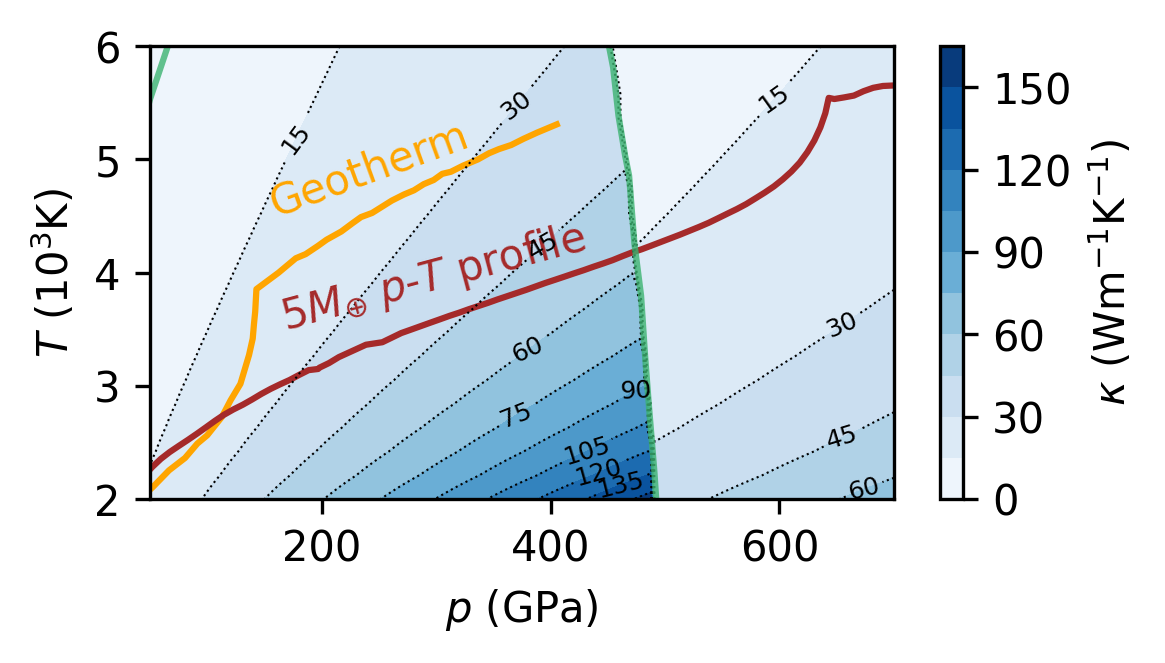

In [4]:
def _plot_phase(scale):
    
    melt_MgO_B1 = np.loadtxt(comp_dir+'B1_melt.txt')
    melt_MgO_B2 = np.loadtxt(comp_dir+'B2_melt.txt')
    B1B2_MgO = np.loadtxt(comp_dir+'B1-B2.txt')
    
    cl='mediumseagreen'

    ax.plot(melt_MgO_B1[:,0],melt_MgO_B1[:,1]*scale*1e3,'-',color=cl,
            linewidth=1.5,alpha=0.8, label='Phase Boundary (Soubiran et al.)')
    ax.plot(melt_MgO_B2[:,0],melt_MgO_B2[:,1]*scale*1e3,'-',color=cl,
            linewidth=1.5,alpha=0.8)
    ax.plot(B1B2_MgO[:,0],B1B2_MgO[:,1]*scale*1e3,'-',color=cl,
            linewidth=1.5,alpha=0.8)

def _plot_geotherm(scale):
    
    data = np.loadtxt(comp_dir + 'Geotherm.txt')
    ax.plot(data[:,0],data[:,1]*scale,'-', color='orange')#, label = 'Geotherm')
    
    data = np.loadtxt(comp_dir + '5M_profile.txt')
    ax.plot(data[:,0],data[:,1]*scale,'-', color='brown')#, label = '$5M_{\oplus}$ P-T profile')    

def _generate_kappa_map():   
    
    xi = np.linspace(50,   700, 200)
    yi = np.linspace(2000, 6000, 20)
    press, temps = np.meshgrid(xi, yi)
    kappa_b1 = prac_formula((press, temps),*p_est)
    kappa_b2 = prac_formula_b2((press, temps),*p_est2)

    data = np.loadtxt(comp_dir+'B1-B2.txt')
    n = 3
    fit = np.polyfit(data[:,0], data[:,1]*1e3, n )
    trans = np.poly1d(fit)

    T_trans = trans(press)

    kappa = np.array(kappa_b1)
    kappa[temps>T_trans] = kappa_b2[temps>T_trans]
    
    return press, temps, kappa

fig, ax = plt.subplots(figsize=(4,2),dpi=300)

scale = 1e-3

ax.text(150,4500*scale,'Geotherm', rotation=20,color='orange')
ax.text(160,3500*scale,'$5M_{\oplus}$ $p$-$T$ profile', rotation=15,color='brown')
_plot_geotherm(scale)

press, temps, kappa = _generate_kappa_map()
cont = ax.contour(press, temps*scale, kappa,  levels= 12, linewidths=0.5, linestyles=':', colors='k')
plt.clabel(cont, fontsize=6, inline=True, colors='k',fmt='%.d')
sr = ax.contourf(press, temps*scale, kappa, levels= 12, cmap=plt.cm.Blues)

plt.colorbar(sr, label='$\kappa\ {\\rm (Wm^{-1}K^{-1})}$', )
             #orientation='horizontal', location='top',shrink=0.8)
#plt.colorbar(sr,ax=ax, orientation='horizontal', location='top',shrink=0.8,
#                 label='$\kappa\ {\\rm (W m^{-1}K^{-1})}$',
#                ticks=[0, 50, 100, 150])
_plot_phase(scale)

ax.set_xlabel('$p$ (GPa)')
ax.set_ylabel('$T$ ($10^3\\rm{K}$)')

ax.set_xlim(50, 700)
ax.set_ylim(2000*scale,6000*scale)